Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 61s 1ms/step - loss: 1.0211 - acc: 0.7359 - val_loss: 0.3097 - val_acc: 0.9126
Epoch 2/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2664 - acc: 0.9202 - val_loss: 0.1955 - val_acc: 0.9425
Epoch 3/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1859 - acc: 0.9454 - val_loss: 0.1448 - val_acc: 0.9571
Epoch 4/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1439 - acc: 0.9583 - val_loss: 0.1175 - val_acc: 0.9651
Epoch 5/20
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1190 - acc: 0.9649 - val_loss: 0.0996 - val_acc: 0.9693
Epoch 6/20
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1021 - acc: 0.9698 - val_loss: 0.0902 - val_acc: 0.9694
Epoch 7/

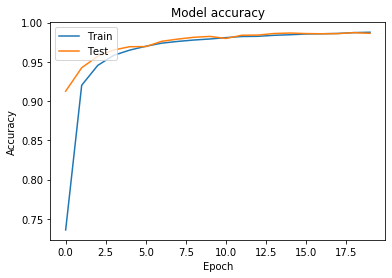

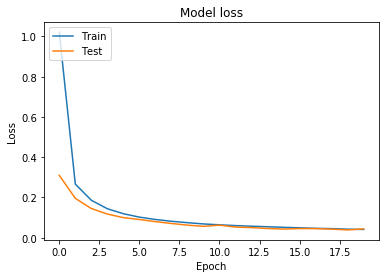

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense ,Flatten,Conv2D,MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

num_classes=10
img_rows,img_cols=28,28

#trainX是60000x28x28的数组，trainY是每张图片对应的数字
(trainX,trainY),(testX,testY)=mnist.load_data()

#由于不同底层对输入要求不一样，根据图像编码格式的要求来设置输入层的格式
if K.image_data_format()=='channels_first':
    trainX=trainX.reshape(trainX.shape[0],1,img_rows,img_cols)
    testX=testX.reshape(testX.shape[0],1,img_rows,img_cols)
    #单通道，通道数在前
    input_shape=(1,img_rows,img_cols)
else:
    trainX=trainX.reshape(trainX.shape[0],img_rows,img_cols,1)
    testX=testX.reshape(testX.shape[0],img_rows,img_cols,1)
    #单通道图片，通道数在后
    input_shape=(img_rows,img_cols,1)

#将图片像素值化为(0,1)之间
trainX=trainX.astype('float32')
testX=testX.astype('float32')
trainX/=255.0
testX/=255.0

trainY=keras.utils.to_categorical(trainY,num_classes)
testY=keras.utils.to_categorical(testY,num_classes)

#构建网络，两个卷积、两个最大池化、两个全连接层
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

#指定模型损失函数(交叉熵损失函数)、优化器、评估原则
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
#训练模型
history=model.fit(trainX,trainY,batch_size=128,epochs=20,validation_split=0.1,validation_data=(testX,testY))

#绘制训练/验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#绘制训练/验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()





#测试集上计算准确率
# score=model.evaluate(testX,testY)
# print('Test loss: ',score[0])
# print('Test accuracy: ',score[1])



